<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/TensorFlow_and_PyTorch_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Character Level Model Generation

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, GRU, LSTM, Lambda, Reshape, SimpleRNNCell
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [31]:
with open("dinos.txt", "r") as f:
    names = f.read().lower().splitlines()

# Create character mapping
chars = sorted(set("".join(names)))  # Unique characters in dataset
chars.append("<EOS>")  # Special end-of-sequence token
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for ch, i in char_to_idx.items()}
vocab_size = len(chars)

# Prepare training sequences
max_length = max(len(name) for name in names)  # Find longest name
X_train, y_train = [], []

for name in names:
    x_seq = [char_to_idx[ch] for ch in name]  # Convert to indices
    y_seq = x_seq[1:] + [char_to_idx["<EOS>"]]  # Shift left for output

    # Pad sequences to max_length
    x_seq += [char_to_idx["<EOS>"]] * (max_length - len(x_seq))
    y_seq += [char_to_idx["<EOS>"]] * (max_length - len(y_seq))

    X_train.append(x_seq)
    y_train.append(y_seq)

X_train = np.array(X_train)
y_train = np.array(y_train)

# One-hot encode input data
X_train_one_hot = np.eye(vocab_size)[X_train]  # Convert to one-hot vectors

# Build the RNN Model (Without Embedding Layer)
model = tf.keras.Sequential([
    Input(shape=(max_length, vocab_size)),  # Input is one-hot encoded
    SimpleRNN(128, return_sequences=True),
    Dense(vocab_size, activation="softmax")  # Output probability for each character
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train_one_hot, y_train, epochs=100, batch_size=32)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4826 - loss: 2.0400
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.6746 - loss: 1.1725
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7127 - loss: 1.0430
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7226 - loss: 0.9822
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7320 - loss: 0.9401
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7434 - loss: 0.8994
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7483 - loss: 0.8775
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7546 - loss: 0.8555
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7555 - loss: 0.8374
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7618 - loss: 0.8156
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7680 - loss: 0.7957
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step

In [32]:
def generate_name(seed_char="a", max_length=20):
    name = seed_char
    for _ in range(max_length):
        x_input = np.array([[char_to_idx[ch] for ch in name] + [char_to_idx["<EOS>"]] * (max_length - len(name))])
        x_input_one_hot = np.eye(vocab_size)[x_input]  # One-hot encode input
        pred_probs = model.predict(x_input_one_hot, verbose=0)[0]
        next_char_idx = np.argmax(pred_probs[len(name) - 1])  # Pick most probable character
        next_char = idx_to_char[next_char_idx]

        if next_char == "<EOS>":
            break  # Stop if end token is predicted
        name += next_char

    return name.capitalize()

# Generate new dinosaur names
for _ in range(10):
    print(generate_name(np.random.choice(chars[:-1])))  # Avoid starting with <EOS>


Changnengousaurus
Raptorrothosur
Gantonsaurus
Yungongcenator
Huangasaurus
Xiangaugnosaurus
Saurophata
Jiangjunosaurus
Quelacon
Changnengousaurus


In [17]:
f = open('dinos.txt')

corpus = []
max_word_length = 0
list_of_chars = []

for word in f:
    word = word.lower().replace('\n', '')
    corpus.append(list(word))
    for char in word:
        list_of_chars.append(char)
    if len(word) > max_word_length:
        max_word_length = len(word)

list_of_chars = list(set(list_of_chars))
#list_of_chars.append('<sos>')
list_of_chars.sort()
list_of_chars.append('<eos>')

list_of_chars.insert(0, '<sos>')

In [18]:
index_to_char = {key: value for key, value in enumerate(list_of_chars)}
char_to_index = {value: key for key, value in enumerate(list_of_chars)}

In [19]:
N = len(corpus)
T = max_word_length
D = len(list_of_chars)
X_one_hot = np.zeros((N, T + 1, D))
y_one_hot = np.zeros((N, T + 1, D))

for i, word in enumerate(corpus):
    word_one_hot = np.zeros((T + 1, D))
    for j, char in enumerate(word):
        word_one_hot[j, char_to_index[char]] = 1

    X_one_hot[i, 1 : , :] = word_one_hot[: -1, :]
    X_one_hot[i, 0, char_to_index['<sos>']] = 1
    y_one_hot[i, :, :] = word_one_hot[:, :]
    y_one_hot[i, len(word), char_to_index['<eos>']] = 1

In [21]:
N = len(corpus)
T = max_word_length
D = len(list_of_chars)
X_one_hot = np.zeros((N, T + 1, D))
y_one_hot = np.zeros((N, T + 1, D))

for i, word in enumerate(corpus):
    word_one_hot = np.zeros((T + 1, D))
    for j, char in enumerate(word):
        word_one_hot[j, char_to_index[char]] = 1

    word_one_hot[len(word):, char_to_index['<eos>']] = 1

    X_one_hot[i, 1 : , :] = word_one_hot[: -1, :]
    X_one_hot[i, 0, char_to_index['<sos>']] = 1
    y_one_hot[i, :, :] = word_one_hot[:, :]
    y_one_hot[i, len(word), char_to_index['<eos>']] = 1

In [26]:
n_a = 100

char_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(T + 1, D)),  # Correct input shape
    tf.keras.layers.SimpleRNN(n_a, return_sequences=True), # return_sequences=True is crucial
    tf.keras.layers.Dense(D, activation='softmax')
])


In [78]:
char_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 27, 100)             │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 27, 28)              │           2,828 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,728 (61.44 KB)

 Trainable params: 15,728 (61.44 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
optimizer = Adam(learning_rate = 0.01, clipvalue = 1.5)

char_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
char_model.fit(X_one_hot, y_one_hot, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4907 - loss: 2.1113
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7026 - loss: 1.0271
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7275 - loss: 0.9255
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7386 - loss: 0.8743
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7460 - loss: 0.8438
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7490 - loss: 0.8328
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7553 - loss: 0.8162
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7591 - loss: 0.8042
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7650 - loss: 0.7846
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7626 - loss: 0.7894
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7756 - loss: 0.7482
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step

In [30]:
def generate_name(model, T, D, index_to_char, char_to_index):
    x = np.zeros((1, T + 1, D))
    x[0, 0, char_to_index['<sos>']] = 1
    generated_name = ""

    for t in range(T):
        probs = model.predict(x[:, :t+1, :])[0, t, :]

        probs[char_to_index['<sos>']] = 0
        probs = probs / np.sum(probs)
        next_index = np.random.choice(range(D), p=probs)
        next_char = index_to_char[next_index]

        if next_char == '<eos>':
            break

        generated_name += next_char
        x[0, t+1, next_index] = 1

    return generated_name


for _ in range(10):
    print(generate_name(char_model, T, D, index_to_char, char_to_index))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
parhalophosaurus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
tianma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━

# Time Series Prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, SimpleRNN, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
level = 2 + 0.05 * np.random.randn(120, )

In [ ]:
trend = np.linspace(0, 10, 120) + 0.1 * np.random.randn(120)

In [ ]:
seasonality = np.sin(np.linspace(0, 119, 120) * (2 *np.pi / 12)) + 0.1 * np.random.randn(120,)

In [ ]:
composite = level + trend + seasonality

In [ ]:
T = 10
D = 1
X = []
Y = []

for t in range(len(composite) - T):
    x = composite[t: t + T]
    X.append(x)

    y = composite[t + T]
    Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T x D
Y = np.array(Y)

print(f'Shape of X: {X.shape} \nShape of Y: {Y.shape}')

Shape of X: (110, 10, 1) 
Shape of Y: (110,)


In [ ]:
split = int(X.shape[0] * 0.8)

In [ ]:
X_train = X[: split, :, :]
y_train = Y[: split]

X_test = X[split : , :, :]
y_test = Y[split: ]

In [ ]:
i = Input(shape = (T, D))
x = SimpleRNN(5, activation = 'tanh')(i)
x = Dense(1)(x)

model = Model(i, x)

In [ ]:
model.compile(loss = 'mse', optimizer = Adam(learning_rate = 0.1))

In [ ]:
result = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - loss: 44.2205 - val_loss: 86.4343
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 21.5292 - val_loss: 33.3758
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.6140 - val_loss: 5.3615
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.7380 - val_loss: 8.7333
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 7.1239 - val_loss: 24.5111
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.6051 - val_loss: 37.1508
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.2969 - val_loss: 36.9627
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 6.6301 - val_loss: 27.7416
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 5.3371 - val_loss: 17.8562
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 5.4437 - val_loss: 13.5531
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 5.8893 - val_loss: 17.7834
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 5.1757 - val_l

In [ ]:
predictions = []
i = 0

while len(predictions) < len(X_test):
    predict = model.predict(X_test[i].reshape(1, -1, 1))[0, 0]
    i+= 1

    predictions.append(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


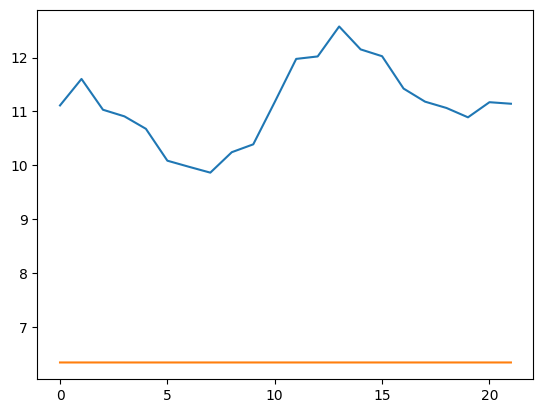

In [ ]:
plt.plot(y_test)
plt.plot(predictions)
plt.show();

In [ ]:
predictions = []
input_X = X_train[-1]

while len(predictions) < X_test.shape[0]:
    predict = model.predict(input_X.reshape(1, -1, 1))[0, 0]

    predictions.append(predict)

    input_X = np.roll(input_X, -1)
    input_X[-1] = predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


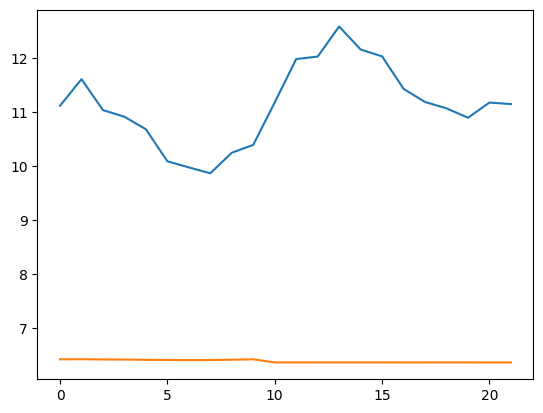

In [ ]:
plt.plot(y_test)
plt.plot(predictions)
plt.show();